# Aula 10 - Finalizando a Rede Neural

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('../Aula8/ripley.csv')
df = df.sample(frac=1).reset_index(drop=True) 

df_treino = df.iloc[:750] 
df_val = df.iloc[750:1000]
df_teste = df.iloc[1000:] 

x_treino, y_treino = df_treino.iloc[:, :-1].values, df_treino.iloc[:,-1].values
x_val, y_val = df_val.iloc[:, :-1].values, df_val.iloc[:,-1].values
x_teste, y_teste = df_teste.iloc[:, :-1].values, df_teste.iloc[:,-1].values

n = 2 
nos = 10
nc = 1 
lr = 1e-2

W = np.random.rand(n, nos) 
bw = np.random.rand(nos) 
V = np.random.rand(nos, nc) 
bv = np.random.rand(nc)

def predict(x):
    S = np.dot(x, W) + bw
    H = relu(S)
    y = sigmoid(np.dot(S, V) + bv)
    return {'prediction': y, 'linear_comb': S, 'activation': H}

def acuracia(x, y):
    yb = predict(x)['prediction']
    yb = 1. * (yb > 0.5)
    
    return sum(yb == y)/len(y)

def relu(x):
    return x * (x > 0)

def grad_relu(x):
    return 1. * (x > 0)

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [8]:
for ep in range(25):
    for i in range(len(x_treino)):
        pred = predict(x_treino[i])

        yb = pred['prediction'][0]
        grad_sigmoid = yb * (1 - yb)
        dy = -(y_treino[i] - yb) # (yb - y)

        
        V = V - lr * dy * grad_sigmoid * pred['activation'].reshape(-1,1)
        bv = bv - lr * dy * grad_sigmoid
        
        W = W - lr * np.dot(x_treino[i].reshape(-1,1), grad_relu(pred['linear_comb']).reshape(1,-1)) *\
                            (grad_sigmoid * dy * V.T)
        bw = bw - lr * dy * V.reshape(-1) * grad_relu(pred['linear_comb']).reshape(-1) * grad_sigmoid
        

    print(f'Epoca[{ep+1}/25] Val Acc {acuracia(x_val, y_val.reshape(-1,1))}')

Epoca[1/25] Val Acc [0.484]
Epoca[2/25] Val Acc [0.72]
Epoca[3/25] Val Acc [0.676]
Epoca[4/25] Val Acc [0.672]
Epoca[5/25] Val Acc [0.696]
Epoca[6/25] Val Acc [0.72]
Epoca[7/25] Val Acc [0.744]
Epoca[8/25] Val Acc [0.764]
Epoca[9/25] Val Acc [0.784]
Epoca[10/25] Val Acc [0.804]
Epoca[11/25] Val Acc [0.812]
Epoca[12/25] Val Acc [0.84]
Epoca[13/25] Val Acc [0.86]
Epoca[14/25] Val Acc [0.876]
Epoca[15/25] Val Acc [0.884]
Epoca[16/25] Val Acc [0.884]
Epoca[17/25] Val Acc [0.888]
Epoca[18/25] Val Acc [0.892]
Epoca[19/25] Val Acc [0.892]
Epoca[20/25] Val Acc [0.9]
Epoca[21/25] Val Acc [0.9]
Epoca[22/25] Val Acc [0.896]
Epoca[23/25] Val Acc [0.9]
Epoca[24/25] Val Acc [0.904]
Epoca[25/25] Val Acc [0.904]


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
x_zeros = x_treino[y_treino == 0.]
x_uns = x_treino[y_treino == 1.]

In [11]:
x, y = np.meshgrid(np.linspace(-1,1,1000), np.linspace(-1,1,1000))
xy = np.array([x.flatten(),y.flatten()]).T

In [12]:
yt = predict(xy)['prediction']
xy = xy[np.abs(yt[:,0] - 0.5) < 0.0005]

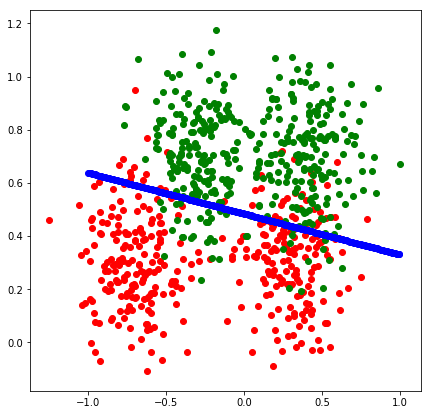

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(x_zeros[:,0], x_zeros[:,1], c='r')
plt.scatter(x_uns[:,0], x_uns[:,1], c='g')
plt.scatter(xy[:,0], xy[:,1], c='b')